<a href="https://colab.research.google.com/github/Telokin/175IC-machine-learning/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TypeError: ignored

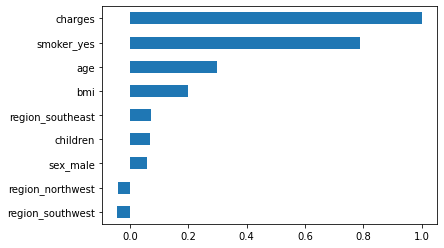

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

np.random.seed(34)
df_raw = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/insurance.csv')

df = df_raw.copy()
df[df.duplicated()]
df_dummies = pd.get_dummies(df, drop_first=True)
corr = df_dummies
df_dummies.corr()['charges'].sort_values(ascending=False)
df_dummies.corr()['charges'].sort_values().plot(kind='barh')
df = list(df)

y = df['charges']
X = df[['age', 'sex', 'children', 'bmi', 'smoker', 'region']] #Nie mogłem zapisać wartosci x i y do listy aby na nich pracowac 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, test_size=0.33)


regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(f'R2 score: {regressor.score(X_test, y_test):.4f}')
y_pred = regressor.predict(X_test)
y_pred[:10]
y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred': y_pred})
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()
predictions.error.plot(kind='hist', bins=30)
mae = mean_absolute_error(y_true, y_pred)
print(f'MAE wynsi: {mae:.2f}')
X_train_ols = sm.add_constant(X_train.values)
ols = sm.OLS(endog=y_train, exog=X_train_ols).fit()
predictors = ['const'] + list(X_train.columns)
print(ols.summary(xname=predictors))